<a id="back_to_top"></a>
# COVID-19 Effects on Post-Secondary Education
by Carloz Gil

*The Notebook contains links that don't operate on Github. It is recommended to view the project below:*<br>
https://nbviewer.org/github/clozgil/COVID19-Effects-on-Post-Secondary-Education/blob/main/COVID-19%20Effects%20on%20Post-Secondary%20Education.ipynb

## Table of Contents
- [Introduction](#Introduction)
- [Data Preparation](#Data_Preparation)
- [Data Cleaning](#Data_Cleaning)
- [Exploratory Data Analysis](#EDA)
    - [How Many People Were Planning to Take Post-Sec Ed Classes](#TNUM_PS)
    - [How has COVID-19 Changed Post-Sec Ed Plans](#PSCHNG)
    - [What Were The Reasons For Post-Sec Ed Changes](#PSWHYCHG)
    - [Why Did People Cancel Their Plans](#PSCHNG2)
        - [People Who Cancelled Because of Pay](#pay)
        - [People Who Cancelled Because Had COVID Concerns](#concerns)
        - [Did Computer/Internet Availability Cause People To Cancel](#format)
    - [For Those Who's Format Changed, How Has Technology Played a Role?](#PSCHNG3)
        - [Computer Availability](#computer)
        - [Internet Availability](#internet)
- [Data Analysis](#data_analysis)
    - [Creating Training and Test Dataset](#dataset)
    - [Feature Selection](#feature)
    - [k-Nearest Neighbors](#knn)
        - [Evaluation of the kNN Model](#evalknn)
    - [Decision Tree](#tree)
        - [Evaluation of the Decision Tree Model](#evaltree)
        - [Visualization of the Decision Tree Model](#viztree)

<a id="Introduction"></a>
# Introduction

This project is an analysis on the disruptions in post-secondary education (post-sec ed) caused by the COVID-19 pandemic. The article "Disparities in Disruptions to Postsecondary Education Plans" published by Dr. Ran Liu from the University of Wisconsin-Madison shows the potentially devasting effects on the economy, population, and under-representated minorities should post-sec ed plans be disrupted. For this reason, this project will be an exploration of the population who had their post-sec ed plans disrupted. We will pay close attention to discovering who those individuals are, and what were the various reasons for those disruptions. Finally, we'll construct a few classification models to try and predict those who are most likely to cancel their plans. For the purpose of this project, we will treat post-sec ed  as any kind of instruction after high school graduation whether it be from a college, university, community college, trade school, or other occupational school (such as cosmetology or school of culinary arts).

Although we do construct models in this notebook, it is by and large an exploration of a large dataset via visualizations. For a ntoebook that features a variety of different models including some deep learning, I have a project that focuses on predicting whether or not an invidual will leave a company below.

https://nbviewer.org/github/clozgil/Employee-Churn-Rate-Analysis-and-Prediction/blob/main/Employee%20Churn%20Rate%20Analysis%20and%20Prediction.ipynb


## Data Sources

The United States Census Bureau began conducting the Household Pulse Survey at the start of the pandemic. Even though the survey has undergone various modifications, it has largely kept the same frame and objective. The Bureau releases a Public Use Data File (PUF) each two weeks, which we will use for this project and can be found below:<br>
https://www.census.gov/programs-surveys/household-pulse-survey/datasets.html


## TimeFrame

Our timeframe will be focused from the survey of week 18 (October 28, 2020) to the survey of week 33 (July 5, 2021). 
The PUF gets released in phases, and even though the survey changes from phase to phase, our goal is to merge as many of them in order to create a longer timeframe. This will enable us to better view trends, which is particularly important since vaccine availability in May 2021 most likely played a role in people's answers to the survey. An additional rationale is that this timeframe most likely covers the periods where post-sec ed plans were made and cancelled.

## Dictionary

For additional information on the data, I recommend reviewing the data dictionary associated with each survey. However, to facilitate the analysis, I will note a few columns of importance:
- TNUM_PS: Number of people in household with post-sec ed plans
- PSCHNG#: Types of changes to post-sec ed plans (data contains 7 different types of changes)
- PSWHYCHG#: Reasons for why there were changes (data contains 9 different types of reasons)

## High Impact Questions
High impact questions drove the direction of this project. Even though the format of the PUF was easy to follow, I tried to develop questions that when answered, might have a significant impact. The idea is to let objectives drive the analysis. Below are a few examples:
- What are the most common changes to post-sec edu?
- Why are post-sec plans changing?
- Who are the people most likely to cancel their post-sec plans?
- What are the most common reasons for why someone would cancel their post-sec plans?
- Does computer and internet availability play a role in the decision to cancel?
- How much impact does a school's decision to remain all virtual have on post-secondary education?

## Observations

As the notebook progresses, there are sections were I note an observations. Those will be shown as
        
        *Observation*
        

[Back to the top](#back_to_top)

<a id="Data_Preparation"></a>
# DATA PREPARATION

In [362]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None

I began by downloading 16 csv files from the Census Bureau link above and placed them in a directory, noted in the path below.

An example file can be viewed below

In [363]:
#We are establishing a path to all the files using the OS module so that we can loop and concat them all

path = os.getcwd() + '/data'

In [364]:
files = os.listdir(path)
files

['wk18_data.csv',
 'wk19_data.csv',
 'wk20_data.csv',
 'wk21_data.csv',
 'wk22_data.csv',
 'wk23_data.csv',
 'wk24_data.csv',
 'wk25_data.csv',
 'wk26_data.csv',
 'wk27_data.csv',
 'wk28_data.csv',
 'wk29_data.csv',
 'wk30_data.csv',
 'wk31_data.csv',
 'wk32_data.csv',
 'wk33_data.csv']

In [365]:
#Example of 1 csv file "wk18_data.csv"

test_df = pd.read_csv(path + '/'+ files[0])

In [366]:
test_df.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,TW_START,UNEMPPAY,UI_APPLY,UI_RECV,TUI_NUMPER,SSA_RECV,SSA_APPLY,SSAPGM1,SSAPGM2,SSAPGM3,SSAPGM4,SSAPGM5,SSALIKELY,SSAEXPCT1,SSAEXPCT2,SSAEXPCT3,SSAEXPCT4,SSAEXPCT5,SSADECISN,EXPNS_DIF,CHNGHOW1,CHNGHOW2,CHNGHOW3,CHNGHOW4,CHNGHOW5,CHNGHOW6,CHNGHOW7,CHNGHOW8,CHNGHOW9,CHNGHOW10,CHNGHOW11,CHNGHOW12,WHYCHNGD1,WHYCHNGD2,WHYCHNGD3,WHYCHNGD4,WHYCHNGD5,WHYCHNGD6,WHYCHNGD7,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,WHYCHNGD13,SPNDSRC1,SPNDSRC2,SPNDSRC3,SPNDSRC4,SPNDSRC5,SPNDSRC6,SPNDSRC7,SPNDSRC8,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,PRIFOODSUF,CURFOODSUF,CHILDFOOD,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,WHEREFREE6,WHEREFREE7,SNAP_YN,SNAPMNTH1,SNAPMNTH2,SNAPMNTH3,SNAPMNTH4,SNAPMNTH5,SNAPMNTH6,SNAPMNTH7,SNAPMNTH8,SNAPMNTH9,SNAPMNTH10,SNAPMNTH11,SNAPMNTH12,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,PRIVHLTH,PUBHLTH,DELAY,NOTGET,PRESCRIPT,MH_SVCS,MH_NOTGET,TENURE,LIVQTR,TBEDROOMS,RENTCUR,MORTCUR,MORTCONF,EVICT,FORCLOSE,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,SCHLHRS,TSTDY_HRS,TCH_HRS,TNUM_PS,PSPLANS1,PSPLANS2,PSPLANS3,PSPLANS4,PSPLANS5,PSPLANS6,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
0,V180000001S10011195410122,18,1,NaN,2,1750.985978,1697.266868,1952,2,1,2,1,2,3,2,7,2,5,1,2,0,2,1,2,2,1,3,-88,3,-88,2,-88,-88,2,1,-99,-99,-99,-99,1,-88,-88,-88,-88,-88,-88,4,1,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,1,1,1,1,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,0,30,2,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,4,2,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88,0,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1
1,V180000001S13010806200112,18,1,NaN,2,1390.792404,1348.123798,1949,2,1,2,1,2,1,2,4,2,3,1,2,0,2,1,2,2,2,-88,7,2,4,2,-88,-88,1,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,2,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,3,3,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88
2,V180000001S33010578200122,18,1,NaN,2,1154.260843,3356.546615,1971,2,1,2,1,2,1,2,6,2,1,4,2,1,2,3,1,2,1,2,-88,2,-88,1,1,2,2,2,-88,-88,-88,-88,-88,4,-88,-88,-88,-88,-88,1,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,-99,-99,-99,-99,-99,-99,-99,2,3,1,1,1,1,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,260,250,2,2,2,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,3,-88,1,4,-88,-88,1,-99,-99,-99,-99,-99,1,-99,1,1,1,-99,1,-99,1,-99,4,20.0,1,0,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,6
3,V180000001S37010721800122,18,1,NaN,2,6807.759448,13197.803639,1985,2,1,2,1,2,1,2,3,2,1,3,2,1,2,2,2,2,1,2,-88,1,-88,2,-88,0,2,2,-88,-88,-88,-88,-88,4,-88,-88,-88,-88,-88,1,1,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-

## Main df

As noted, we used week 18 to week 33. We will loop over all files in the path and concat them to create 1 large df. The Census changed the names of some columns during this time period, so we'll address those here as well

In [367]:
files = [] #list were we will store all the dfs, wk 18 - 33

for i in os.listdir(path):
    
    temp_df = pd.read_csv(path + '/' + i) # We read each csv file
    for col in temp_df.columns:
        if col == 'INTRNT1':
            temp_df.rename(columns = {col:'INTRNTRV1'}, inplace = True)
        elif col == 'INTRNT2':
            temp_df.rename(columns = {col:'INTRNTRV2'}, inplace = True)
        elif col == 'INTRNT3':
            temp_df.rename(columns = {col:'INTRNTRV3'}, inplace = True)

    files.append(temp_df) #store in the files list 

df = pd.concat(files, ignore_index=True) #and concat them all to create 1 large df
df.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,TW_START,UNEMPPAY,UI_APPLY,UI_RECV,TUI_NUMPER,SSA_RECV,SSA_APPLY,SSAPGM1,SSAPGM2,SSAPGM3,SSAPGM4,SSAPGM5,SSALIKELY,SSAEXPCT1,SSAEXPCT2,SSAEXPCT3,SSAEXPCT4,SSAEXPCT5,SSADECISN,EXPNS_DIF,CHNGHOW1,CHNGHOW2,CHNGHOW3,CHNGHOW4,CHNGHOW5,CHNGHOW6,CHNGHOW7,CHNGHOW8,CHNGHOW9,CHNGHOW10,CHNGHOW11,CHNGHOW12,WHYCHNGD1,WHYCHNGD2,WHYCHNGD3,WHYCHNGD4,WHYCHNGD5,WHYCHNGD6,WHYCHNGD7,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,WHYCHNGD13,SPNDSRC1,SPNDSRC2,SPNDSRC3,SPNDSRC4,SPNDSRC5,SPNDSRC6,SPNDSRC7,SPNDSRC8,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,PRIFOODSUF,CURFOODSUF,CHILDFOOD,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,WHEREFREE6,WHEREFREE7,SNAP_YN,SNAPMNTH1,SNAPMNTH2,SNAPMNTH3,SNAPMNTH4,SNAPMNTH5,SNAPMNTH6,SNAPMNTH7,SNAPMNTH8,SNAPMNTH9,SNAPMNTH10,SNAPMNTH11,SNAPMNTH12,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,PRIVHLTH,PUBHLTH,DELAY,NOTGET,PRESCRIPT,MH_SVCS,MH_NOTGET,TENURE,LIVQTR,TBEDROOMS,RENTCUR,MORTCUR,MORTCONF,EVICT,FORCLOSE,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNTRV1,INTRNTRV2,INTRNTRV3,SCHLHRS,TSTDY_HRS,TCH_HRS,TNUM_PS,PSPLANS1,PSPLANS2,PSPLANS3,PSPLANS4,PSPLANS5,PSPLANS6,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME,RECVDVACC,DOSES,GETVACC,WHYNOT1,WHYNOT2,WHYNOT3,WHYNOT4,WHYNOT5,WHYNOT6,WHYNOT7,WHYNOT8,WHYNOT9,WHYNOT10,WHYNOT11,WHYNOTB1,WHYNOTB2,WHYNOTB3,WHYNOTB4,WHYNOTB5,WHYNOTB6,HADCOVID,EIP,EIPSPND1,EIPSPND2,EIPSPND3,EIPSPND4,EIPSPND5,EIPSPND6,EIPSPND7,EIPSPND8,EIPSPND9,EIPSPND10,EIPSPND11,EIPSPND12,EIPSPND13,ACTVDUTY1,ACTVDUTY2,ACTVDUTY3,ACTVDUTY4,ACTVDUTY5,GETVACRV,COVPRVNT,WRKLOSSRV,RSNNOWRKRV,TW_YN,TW_COV,WKVOL,SETTING,UI_APPLYRV,UI_RECVRV,UI_RECVNOW,SSA_APPLYRV,SSAPGMRV1,SSAPGMRV2,SSAPGMRV3,SSAPGMRV4,SSAPGMRV5,SSALIKELYRV,EIP_YN,EIPRV,CHNGSHOP1,CHNGSHOP2,CHNGSHOP3,CHNGSVCS1,CHNGSVCS2,CHNGSVCS3,CHNGSHP1ML,CHNGSHP2ML,CHNGSHP3ML,CHNGSVC1ML,CHNGSVC2ML,CHNGSVC3ML,CASHUSE,SPNDSRC9,FEWRTRIP1,FEWRTRIP2,FEWRTRIP3,PRVRIDESHR,FOODRSNRV1,FOODRSNRV2,FOODRSNRV3,FOODRSNRV4,TELEHLTH,TELECHLD,PRVNTIVE,PRVNTWHY1,PRVNTWHY2,PRVNTWHY3,PRVNTWHY4,PRVNTWHY5,PRVNTWHY6,PRVNTWHY7,SEEING,HEARING,REMEMBERING,MOBILITY,LIVQTRRV,ENRPUBCHK,ENRPRVCHK,ENRHMSCHK,TENROLLPUB,TENROLLPRV,TENROLLHMSCH,ENROLLNONE,TEACH6,TEACH7,TEACH8,HYBRID,INTRNTRV4,SCHLFOOD,SCHLFDHLP1,SCHLFDHLP2,SCHLFDHLP3,SCHLFDHLP4,CHLDCARE,CHLDIMPCT1,CHLDIMPCT2,CHLDIMPCT3,CHLDIMPCT4,CHLDIMPCT5,CHLDIMPCT6,CHLDIMPCT7,CHLDIMPCT8,CHLDIMPCT9
0,V180000001S10011195410122,18,1,NaN,2,1750.985978,1697.266868,1952,2,1,2,1,2,3,2,7,2,5,1,2,0,2,1,2.0,2,1,3,-88.0,3.0,-88.0,2.0,-88.0,-88.0,2,1.0,-99.0,-99.0,-99.0,-99.0,1.0,-88.0,-88,-88,-88,-88,-88,4,1,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,-99,-99,1.0,1,1,1.0,1.0,1,-88,-88.0,-88.0,-88.0,-88.0,-88.0,2,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,2,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,0,30,2.0,2.0,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,4,2.0,2.0,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-88.0,-88,-88,-88,-88,-88,-88.0,-88.0,0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Subsections of the Main df

The PUF survey is created with sections in mind (e.g., customer behavior, vaccine information, racial and ethnic information, just to name a few). The combination of 16 different PUFs made an unnecessarily large dataframe. We will focus only on the questions and sections of the survey that are relevant to both post-sec ed and, more specifically, our HIQs established above. We will slice our df and create three sub-dataframes, isolating the sections that are relevant to our analysis. We will look at
- post-sec-ed information, 
- personal info, 
- tech availability

To advance this project, one could look at consumer behavior and financial information

**Post-Sec Ed**

In [368]:
# All questions related to post-secondary education

post_sec_ed = ['SCRAM','WEEK','TNUM_PS','PSCHNG1','PSCHNG2',
               'PSCHNG3','PSCHNG4','PSCHNG5','PSCHNG6','PSCHNG7',
               'PSWHYCHG1','PSWHYCHG2','PSWHYCHG3','PSWHYCHG4','PSWHYCHG5','PSWHYCHG6','PSWHYCHG7',
               'PSWHYCHG8','PSWHYCHG9']

In [369]:
second_df = df[post_sec_ed]
second_df.head()

,SCRAM,WEEK,TNUM_PS,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9
0,V180000001S10011195410122,18,0,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88
1,V180000001S13010806200112,18,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88
2,V180000001S33010578200122,18,0,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88
3,V180000001S37010721800122,18,0,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88
4,V180000001S52011126710122,18,0,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88


**Personal Info**

In [370]:
# Personal questions about the individuals completing this survey. This will be key later on in our analysis

personal = 'EST_ST	REGION	TBIRTH_YEAR	EGENDER	RHISPANIC	RRACE	EEDUC	MS	THHLD_NUMPER	THHLD_NUMKID	THHLD_NUMADLT	INCOME'.split('\t')
personal_df = df[personal]
personal_df.head(3)

,EST_ST,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,MS,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,INCOME
0,1,2,1952,1,1,3,7,5,1,0,1,1
1,1,2,1949,1,1,1,4,3,1,0,1,-88
2,1,2,1971,1,1,1,6,1,4,1,3,6


**Tech Availability**

The below questions are questions that would not have been relevant a few years ago. However, given the current environment, technology plays a crucial role in education

In [371]:
#Questions related to technology

tech = ['COMPAVAIL', 'INTRNTAVAIL', 'INTRNTRV1', 'INTRNTRV2', 'INTRNTRV3', 'INTRNTRV4']
tech_df = df[tech]
tech_df.head()

,COMPAVAIL,INTRNTAVAIL,INTRNTRV1,INTRNTRV2,INTRNTRV3,INTRNTRV4
0,-88,-88,-88,-88,-88,NaN
1,-88,-88,-88,-88,-88,NaN
2,1,1,-99,1,-99,NaN
3,-88,-88,-88,-88,-88,NaN
4,-88,-88,-88,-88,-88,NaN


## Merge All Three

We will merge these three dfs to obtain one main df

In [372]:
second_df.shape

(1157791, 19)

In [373]:
personal_df.shape

(1157791, 12)

In [374]:
tech_df.shape

(1157791, 6)

**The final df that we will use for the remainder of this notebook is `education_df`**

In [375]:
education_df = pd.concat([second_df, personal_df, tech_df], axis = 1)
education_df.shape

(1157791, 37)

<AxesSubplot:>

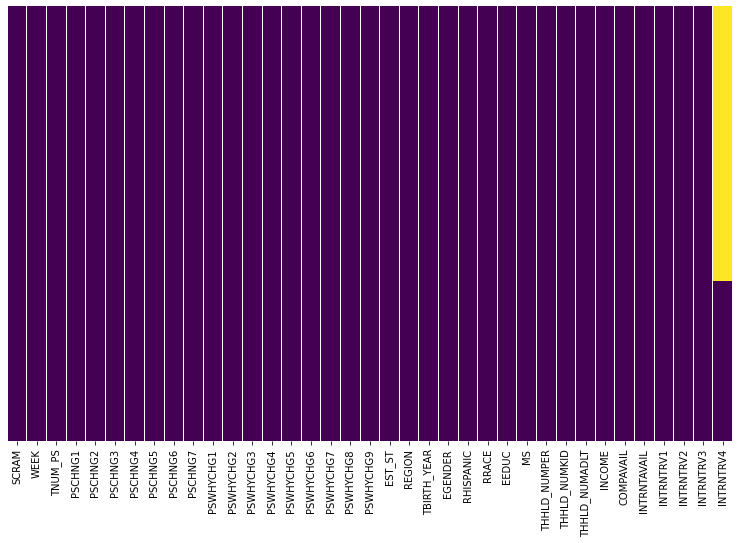

In [376]:
#A quick look at the completeness of the survey
plt.rc('figure', figsize = (13,8))
sns.heatmap(education_df.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

[Back to the top](#back_to_top)

---

<a id="Data_Cleaning"></a>
# DATA CLEANING

We faced a few initial challenges. Namely, -99 and -88 as values for "Question seen but category not selected" and "Missing / not reported" respectively. Although our ultimate goal is to have dummy variables where appropriate, some questions cannot have a 0 since "not answered" or "seen but not selected" does not necessarily equal the answer "no".

Column TNUM_PS, which asks "Before the pandemic, how many members of your household were planning to take classes in the fall", is critical. Even though "seen but not selected" could be interpreted as a "no", we want to get rid of these columns since we are interested in understanding the effects on plans made. For the reason, we will remove all rows where the answer is either 0, missing, or -99.

The column names are meant to be interpretted with the assistance of the dictionary. For the purpose of this notebook, we will rename columns as the project progresses and not all at once

We will tackle the following objectives

- Replace all -88 with NaN in order to really see how many questions were not answered in the survey
- replace -99 in TNUM_PS with NaN
- Delete all rows where there is a NaN in TNUM_PS
- Replace -99 (besides in TNUM_PS) with 0
- Handle NaN (fill with 0, get ride of rows, get ride of columns)

The answer -88 can be treated as missing, so we replace it with a NaN

In [377]:
#Replace all -88 with NaN in order to really see the missing values

education_df.replace({-88:np.nan}, inplace = True)

In [378]:
# Get rid of everyone who did not have any plans of post_sec

education_df = education_df[education_df['TNUM_PS'] != 0.0]

In [379]:
# Replace all -99 in column TNUM_PS with NaN. 
# This column guides other answers

education_df['TNUM_PS'].replace({-99:np.nan}, inplace = True)

In [380]:
# 56% of TNUM_PS is missing
education_df.TNUM_PS.isnull().sum() / education_df.shape[0]

0.5635144446712944

In [381]:
#drop all rows where there is a NaN in TNUM_PS
#we are only looking at people who had plans to take post-secondary grad

education_df.dropna(subset=['TNUM_PS'], axis = 0, inplace = True)

In [382]:
education_df.TNUM_PS.unique()

array([1., 2., 3.])

In [383]:
education_df.shape

(205239, 37)

In [384]:
# Replace all -99 ('skipped' or 'did not apply') with a 0

education_df.replace({-99:0}, inplace = True)

### Handling Missing Values

Now that all appropriate values have been replaced we are able to see that we are dealing we a significant amount of missing values.

In [385]:
miss_sum = education_df.isnull().sum()
miss_count = education_df.isnull().count()
percent = round(miss_sum / miss_count * 100, 1)
percent_df = pd.DataFrame({'count':miss_sum, 'percent(%)':percent})
percent_df

,count,percent(%)
SCRAM,0,0.0
WEEK,0,0.0
TNUM_PS,0,0.0
PSCHNG1,3112,1.5
PSCHNG2,3112,1.5
PSCHNG3,3112,1.5
PSCHNG4,3112,1.5
PSCHNG5,3112,1.5
PSCHNG6,3112,1.5
PSCHNG7,3112,1.5


Even though columns associate with "PSWHYCHG", "COMPAVAIL", "INTERNTRV" are missing significant values, we would like to keep those variables since they deal specifically with the reasons for plans changes and computer and internet availability, which is relevant for this project. Given that our df remains large, instead of dropping the columns we will drop the rows 

<AxesSubplot:>

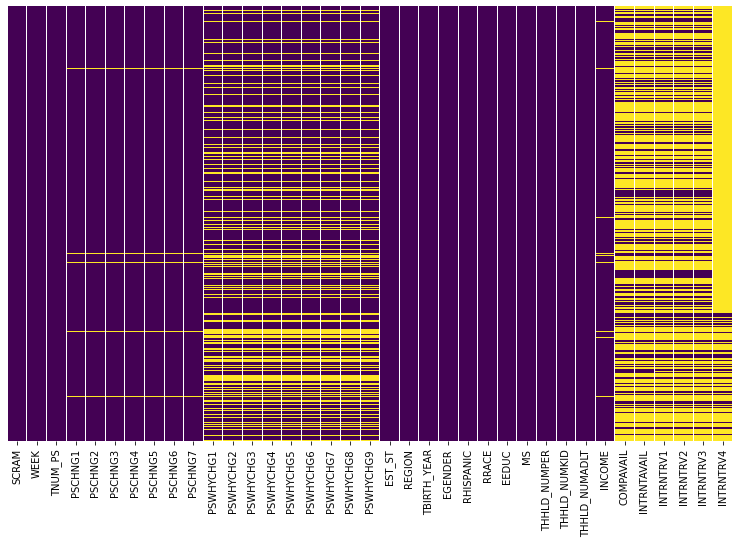

In [386]:
sns.heatmap(education_df.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

In [387]:
education_df.WEEK.unique()

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33.])

In [388]:
education_df.dropna(axis = 0, subset=['PSWHYCHG1', 'COMPAVAIL','INTRNTRV1'], inplace = True)

In [389]:
education_df.drop('INTRNTRV4', axis = 1, inplace = True)

We will replace missing values in income with the mean

In [390]:
education_df.fillna({'INCOME':education_df.INCOME.mean()}, inplace = True)

<AxesSubplot:>

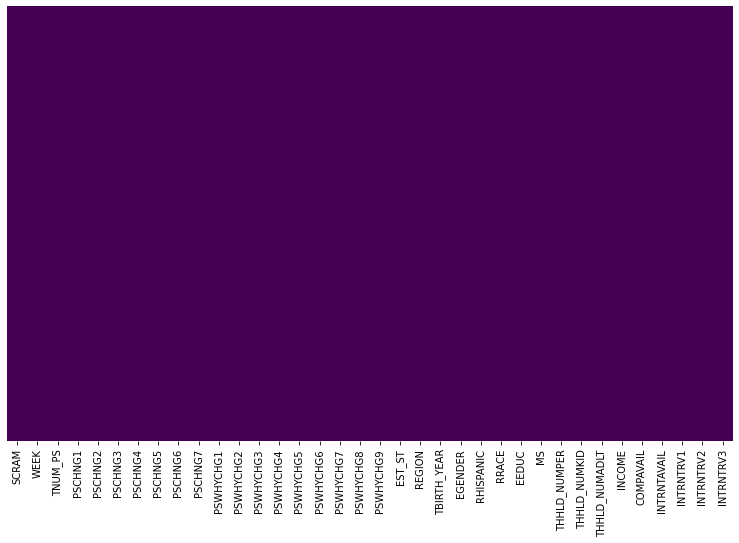

In [391]:
sns.heatmap(education_df.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

In [392]:
education_df.shape

(44227, 36)

[Back to the top](#back_to_top)

---

<a id="EDA"></a>
# EXPLORATORY DATA ANALYSIS

<a id="TNUM_PS"></a>
## How Many People Were Planning to Take Post-Sec Ed Classes

The column `TNUM_PS` reflects the number of people who had planns to take classes in the fall from a college, university, community college, trade school, or other occupational school before the pandemic.

Let's first get an overall idea of how many people were planning to take classes, and observe the trend across time.

In [393]:
#TNUM_PS represents num of people planning to take classes
#Note that 0 is not an option since we removed people who did not have plans
education_df.TNUM_PS.unique()

array([2., 1., 3.])

In [394]:
#Sum of all people with plans per week
tnum_num = education_df.groupby('WEEK')['TNUM_PS'].sum()
tnum_num

WEEK
18.0    4036.0
19.0    5161.0
20.0    5242.0
21.0    5090.0
22.0    4613.0
23.0    5239.0
24.0    4792.0
25.0    4511.0
26.0    4153.0
27.0    3835.0
28.0    2428.0
29.0    2564.0
30.0    2439.0
31.0    2225.0
32.0    2095.0
33.0    1927.0
Name: TNUM_PS, dtype: float64

<AxesSubplot:xlabel='WEEK', ylabel='TNUM_PS'>

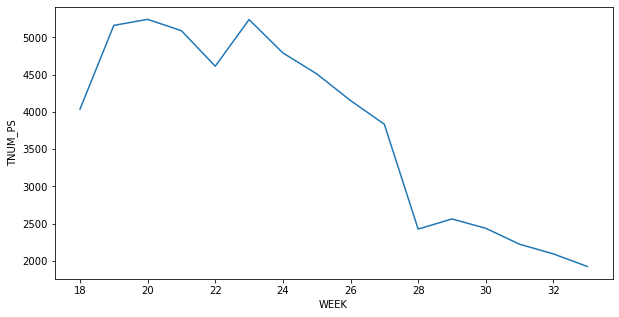

In [395]:
plt.figure(figsize=(10,5))
sns.lineplot(data=tnum_num)

It is clear that the biggest decreased occured between week 23 through week 28 (Jan 20 - Apr 26). Let's zoom in on that date range

<AxesSubplot:xlabel='WEEK', ylabel='TNUM_PS'>

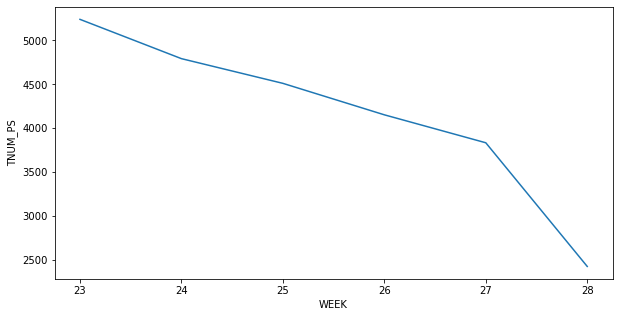

In [396]:
plt.figure(figsize=(10,5))
sns.lineplot(data = tnum_num.loc[23.0:28.0]) #wk 23 - 28

    *Observation*

The decline might initially appear alarming. One important thing to remember is that the survey documents plans before the pandemic. It would be interesting for the Census Bureau to document how many people currenly have plans (that is, during the pandemic) and compare to previous results to see if sentiment around post-sec ed has changed due to COVID or its effects (hybrid & online versus in-person).

A couple of things could be going on here. Interest in post-sec ed might genuinly have been declining (although not necessarily because of the pandemic) or the students who were in no position to make college plans 2 years ago (junior high school student or a freshman in high school, for example) are now in a place to make plans, but are no longer interested in pursing post high school classes given the uncertainty

[Back to the top](#back_to_top)

<a id="PSCHNG"></a>
## How has COVID-19 Changed Post-Sec Ed Plans

### Overview
Columns `PSCHNG1`-`PSCHNG7` represents 7 reasons for why someone who answered "YES" to having plans (column `TNUM_PS` above) changed their education plans in the fall. Here we simply try to understand how has COVID changed people's plans.

- PSCHNG1: Plans to take classes this term have not changed
- PSCHNG2: All plans to take classes this fall have been canceled.
- PSCHNG3: Classes are in different formats this term (for example, change from in-person to online).
- PSCHNG4: Fewer classes are being taken this term
- PSCHNG5: More classes are being taken this term
- PSCHNG6: Classes are being taken from a different institution
- PSCHNG7: Classes are being taken for a different kind of certificate, or degree. 

Let's begin with a simple overview

In [397]:
change = 'PSCHNG1	PSCHNG2	PSCHNG3	PSCHNG4	PSCHNG5	PSCHNG6	PSCHNG7'.split('\t')

In [398]:
change_df = education_df[change]
change_df.head()

,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7
32,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,1.0,0.0,0.0,0.0,0.0
85,0.0,1.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,1.0,1.0,0.0,0.0,0.0
106,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [399]:
sums = pd.DataFrame(data = change_df.sum(), columns = ['sums'], index = change_df.sum().index)
sums

,sums
PSCHNG1,3254.0
PSCHNG2,16717.0
PSCHNG3,23743.0
PSCHNG4,6904.0
PSCHNG5,781.0
PSCHNG6,1868.0
PSCHNG7,2086.0


<AxesSubplot:ylabel='sums'>

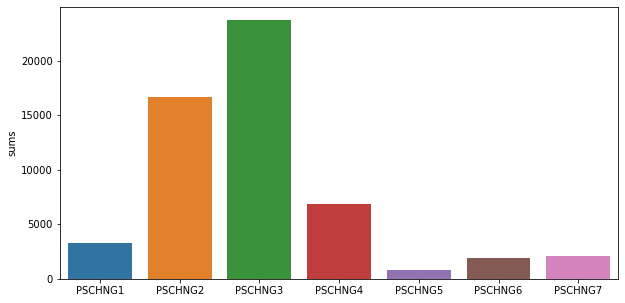

In [400]:
#Sum of the most common reasons for how plans have changed across the 14 weeks
plt.figure(figsize = (10,5))
sns.barplot(x = sums.index, y = sums.sums, data = sums)

- PSCHNG1: Plans to take classes this term have not changed
- **PSCHNG2: All plans to take classes this fall have been canceled.**
- **PSCHNG3: Classes are in different formats this term (for example, change from in-person to online).**
- PSCHNG4: Fewer classes are being taken this term
- PSCHNG5: More classes are being taken this term
- PSCHNG6: Classes are being taken from a different institution
- PSCHNG7: Classes are being taken for a different kind of certificate, or degree. 

    *Observation*

It is clear that the most common changes to post-sec ed have been to 1.) change format (in-person to online) and 2.) cancel all plans, which is the most serious of the changes. A reduction in classes is the third most common, and an important observation is the low numbers of people who's plans have not changed. This can act as a simple reminder that a lot of individuals have seen an impact to their education plans in one way or another.

### Trend Observation

Next, let's look at the trends across the 14 weeks. We will pay especial attention to plans that were cancelled and plans that changed format.

- PSCHNG2: All plans to take classes have been cancelled
- PSCHNG3: Classes are in different format

In [401]:
change_trend = education_df.groupby('WEEK')[change].sum()
change_trend

,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7
WEEK,,,,,,,
18.0,277.0,1345.0,1542.0,408.0,41.0,97.0,101.0
19.0,309.0,1750.0,1897.0,540.0,38.0,126.0,109.0
20.0,331.0,1755.0,1924.0,503.0,34.0,106.0,127.0
21.0,337.0,1655.0,1877.0,496.0,57.0,132.0,116.0
22.0,310.0,1416.0,1668.0,496.0,52.0,135.0,144.0
23.0,375.0,1592.0,1908.0,578.0,48.0,161.0,175.0
24.0,358.0,1390.0,1740.0,561.0,45.0,152.0,151.0
25.0,348.0,1294.0,1570.0,536.0,54.0,151.0,172.0
26.0,311.0,1152.0,1460.0,495.0,64.0,171.0,159.0


<AxesSubplot:xlabel='WEEK'>

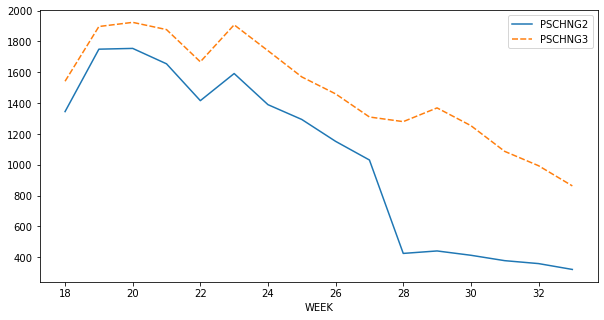

In [402]:
plt.figure(figsize = (10,5))
sns.lineplot(data = change_trend[['PSCHNG2', 'PSCHNG3']]) #PSCHNG2:Cancelled, PSCHNG3: Format Changed

[Back to the top](#back_to_top)

<a id="PSWHYCHG"></a>
## What Were The Reasons For Post-Sec Ed Changes

A lot of individuals experienced changes to their education. Classes got cancelled, classes changed to remote, fewer classes were taken, more classes were taken, or even classes for a different kind of degree are all examples of the changes we explored above. This section explores the reasons those changes occured

### Overview

Columns `PSWHYCHG1` - `PSWHYCHG9` represents 9 reasons for why somone made the changes to post-sec ed plans.

- PSWHYCHG1: Had covid or concerns about getting covid
- PSWHYCHG2: Caring for someone with coronavirus
- PSWHYCHG3: Caring for others whose care arrangements are disrupted (e.g., loss of day care or adult care programs)
- PSWHYCHG4: Institution changed content or format of classes (in-person to online)
- PSWHYCHG5: Changes to financial aid
- PSWHYCHG6: Changes to campus life
- PSWHYCHG7: Uncertainty about how classes/program might change 
- PSWHYCHG8: Not able to pay for classes
- PSWHYCHG9: Other reason

In [403]:
why = 'PSWHYCHG1	PSWHYCHG2	PSWHYCHG3	PSWHYCHG4	PSWHYCHG5	PSWHYCHG6	PSWHYCHG7	PSWHYCHG8	PSWHYCHG9'.split('\t')

In [404]:
why_df = education_df[why]
why_df.head()

,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9
32,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
85,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [405]:
why_sums = pd.DataFrame(data = why_df.sum(), columns = ['sums'], index = why_df.sum().index)
why_sums

,sums
PSWHYCHG1,12556.0
PSWHYCHG2,995.0
PSWHYCHG3,5866.0
PSWHYCHG4,22084.0
PSWHYCHG5,5128.0
PSWHYCHG6,6365.0
PSWHYCHG7,9654.0
PSWHYCHG8,11471.0
PSWHYCHG9,4135.0


<AxesSubplot:ylabel='sums'>

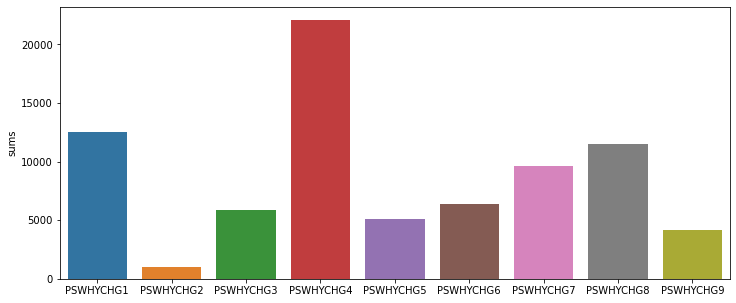

In [406]:
plt.figure(figsize = (12,5))
sns.barplot(x = why_sums.index, y = why_sums.sums, data = why_sums)

- **PSWHYCHG1: Had covid or concerns about getting covid**
- PSWHYCHG2: Caring for someone with coronavirus
- PSWHYCHG3: Caring for others whose care arrangements are disrupted (e.g., loss of day care or adult care programs)
- **PSWHYCHG4: Institution changed content or format of classes (in-person to online)**
- PSWHYCHG5: Changes to financial aid
- PSWHYCHG6: Changes to campus life
- PSWHYCHG7: Uncertainty about how classes/program might change 
- PSWHYCHG8: Not able to pay for classes
- PSWHYCHG9: Other reason

    *Observation*

It is no suprise that "concerns for covid" and "format changes" are the top 2 reasons for why plans changed. More concerning though is that a significant amount of people changed their plans because of uncertainty and cost. Although it would be interesting to see if there was a correlation there (uncertainty towards how one might pay).

### Trends Observation

Let's observe some trends. Specifically, let's pay attention to the trend in "concerns about getting covid" and see how pandemic fatique is shown over time.

In [407]:
why_trend = education_df.groupby('WEEK')[why].sum()
why_trend

,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9
WEEK,,,,,,,,,
18.0,951.0,46.0,440.0,1531.0,299.0,433.0,662.0,811.0,286.0
19.0,1212.0,83.0,619.0,1871.0,429.0,492.0,864.0,1097.0,361.0
20.0,1262.0,83.0,615.0,1838.0,435.0,531.0,843.0,1078.0,339.0
21.0,1163.0,96.0,539.0,1837.0,453.0,550.0,822.0,1058.0,334.0
22.0,1002.0,98.0,457.0,1572.0,408.0,445.0,775.0,932.0,315.0
23.0,1123.0,89.0,506.0,1726.0,485.0,545.0,897.0,1093.0,375.0
24.0,1047.0,89.0,490.0,1556.0,426.0,510.0,873.0,990.0,307.0
25.0,904.0,86.0,454.0,1450.0,425.0,460.0,790.0,951.0,347.0
26.0,852.0,60.0,419.0,1308.0,416.0,438.0,761.0,872.0,311.0


<AxesSubplot:xlabel='WEEK', ylabel='PSWHYCHG1'>

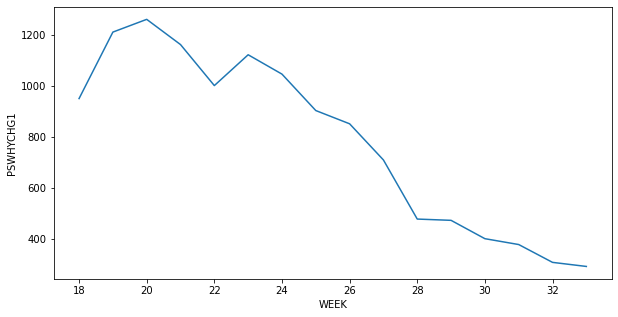

In [408]:
#Concerns for covid

plt.figure(figsize = (10,5))
sns.lineplot(data = why_trend['PSWHYCHG1']) # PSWHYCHG1 = concerns for covid

    *Observation*

We do see a decline in concerns for covid. An important observation is that TNUM_PS (number of people who had plans for post-sec ed) had also been decline. A limitation to this particular analysis is that we don't know if PSWHYCHG1 is decreasing because people geniunly no longer have concerns for covid or if people simply don't have plans for post-sec ed, which would inherently lower this number.

[Back to the top](#back_to_top)

<a id="PSCHNG2"></a>
## Why Did People Cancel Their Plans

**Column Explanation**<br>
Column `PSCHNG2` are individuals who cancelled, and columns `PSWHYCHG#` are the reasons for those changes.

**Overview**<br>
As seen from the sections above, a little bit over 16,000 people cancelled their plans in the span of just a couple of weeks. This section explores the reasons why that happened (had covid, caring for someone with covid, remote format, etc)

In [409]:
#list assigned above - in the overview section of "What Were The Reasons For Post-Sec Ed Changes"
why

['PSWHYCHG1',
 'PSWHYCHG2',
 'PSWHYCHG3',
 'PSWHYCHG4',
 'PSWHYCHG5',
 'PSWHYCHG6',
 'PSWHYCHG7',
 'PSWHYCHG8',
 'PSWHYCHG9']

In [410]:
#for those who cancelled their plans (PSCHNG2 = 1), let's look at their reasons
why_cancel = education_df[education_df.PSCHNG2 == 1][why]
why_cancel.head()

,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9
32,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
85,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
127,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
195,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [411]:
why_cancel_sum = pd.DataFrame(data = why_cancel.sum(), columns=['sums'], index = why_cancel.sum().index)
why_cancel_sum

,sums
PSWHYCHG1,6009.0
PSWHYCHG2,530.0
PSWHYCHG3,3793.0
PSWHYCHG4,4236.0
PSWHYCHG5,2628.0
PSWHYCHG6,1480.0
PSWHYCHG7,4516.0
PSWHYCHG8,7570.0
PSWHYCHG9,2269.0


<AxesSubplot:ylabel='sums'>

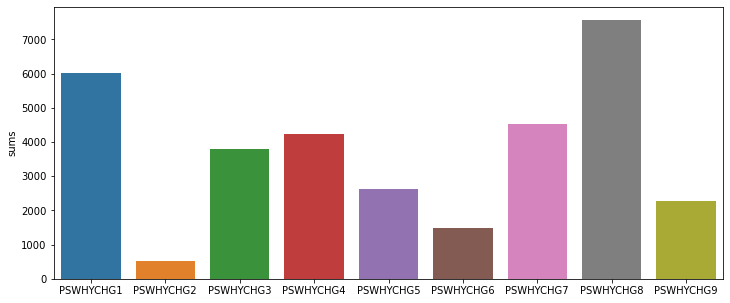

In [412]:
plt.figure(figsize = (12,5))
sns.barplot(x = why_cancel_sum.index, y = why_cancel_sum['sums'], data = why_cancel_sum)

- **PSWHYCHG1: Had covid or concerns about getting covid**
- PSWHYCHG2: Caring for someone with coronavirus
- PSWHYCHG3: Caring for others whose care arrangements are disrupted (e.g., loss of day care or adult care programs)
- PSWHYCHG4: Institution changed content or format of classes (in-person to online)
- PSWHYCHG5: Changes to financial aid
- PSWHYCHG6: Changes to campus life
- PSWHYCHG7: Uncertainty about how classes/program might change 
- **PSWHYCHG8: Not able to pay for classes**
- PSWHYCHG9: Other reason

    *Observation*

In bold are the two most common reasons for why people cancelled their education plans; 1) had covid or concerns about getting covid and 2.) not able to pay classes

In the following sections, we will focus on studying the people who cancelled because they were unable to pay, they had covid or concerns about getting covid, and they were uncertain how classes/programs might change. We'll look at
- Where they are
- If the number of people in a household matters
- Does the number of children matter
- Break down in race
- Break down in hispanics
- Marriage status
- Degrees of the people who cancelled

<a id="pay"></a>
### Who Are The People Who Cancelled Their Plans Because of Pay

**Column Explanation**<br>
Column `PSCHNG2` are individuals who cancelled, and column `PSWHYCHG8` are those people who were unable to pay.

**Overview**<br>
Cancelling post-sec ed plans is the most serious of the education changes, and 7570 people cancelled their education plans because they were unable to pay. Unaffordable tuition is nothing new. Still, for this analysis we will begin by glance at the demographics of someone who is unable to pay and decided to cancel (versus seeking financial aid or other assistance)

In [413]:
#PSCHNG2 ==1 means they cancelled their plans
#PSWHYCHG8 == 1 means they were not able to pay

unable_pay = education_df[(education_df['PSCHNG2'] == 1.0) & (education_df['PSWHYCHG8'] == 1.0)]
unable_pay.head()

,SCRAM,WEEK,TNUM_PS,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,EST_ST,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,MS,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,INCOME,COMPAVAIL,INTRNTAVAIL,INTRNTRV1,INTRNTRV2,INTRNTRV3
106,V180010006S72160603010112,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,37.0,2.0,1977.0,2.0,1.0,1.0,6.0,4.0,3.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0
197,V180020001S11211741900112,18.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,4.0,1977.0,1.0,1.0,1.0,6.0,1.0,4.0,2.0,2.0,3.0,2.0,2.0,0.0,1.0,0.0
220,V180020003S32230310010112,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,23.0,1.0,1972.0,1.0,1.0,1.0,6.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
408,V180030987M54420138300112,18.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,42.0,1.0,1974.0,2.0,1.0,2.0,7.0,1.0,5.0,1.0,4.0,8.0,1.0,1.0,0.0,1.0,0.0
428,V180040001S74410089900122,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,41.0,4.0,1983.0,1.0,1.0,1.0,5.0,3.0,2.0,1.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0


#### Where are they?

In [414]:
#EST_ST signifies a state's code

location = unable_pay.groupby('EST_ST')['PSWHYCHG8'].value_counts().to_frame()
location.rename(columns = {'PSWHYCHG8':'cancelled'}, inplace = True)
location = location.reset_index()
location.drop('PSWHYCHG8', axis = 1, inplace = True)
location = location.sort_values('cancelled', ascending = False)
location

,EST_ST,cancelled
4,6.0,582
43,48.0,553
9,12.0,259
47,53.0,250
44,49.0,243
2,4.0,226
37,41.0,216
13,17.0,213
31,35.0,211
20,24.0,206


In [415]:
location.columns

Index(['EST_ST', 'cancelled'], dtype='object')

Some of the most obvious locations where people are cancelling because they are unable to pay are:
- 6 = California
- 48 = Texas
- 12 = Florida
- 53 = Washington
- 49 = Utah
- 4 = Arizona
- 35 = New Mexico
- 41 = Oregon

<AxesSubplot:xlabel='cancelled', ylabel='EST_ST'>

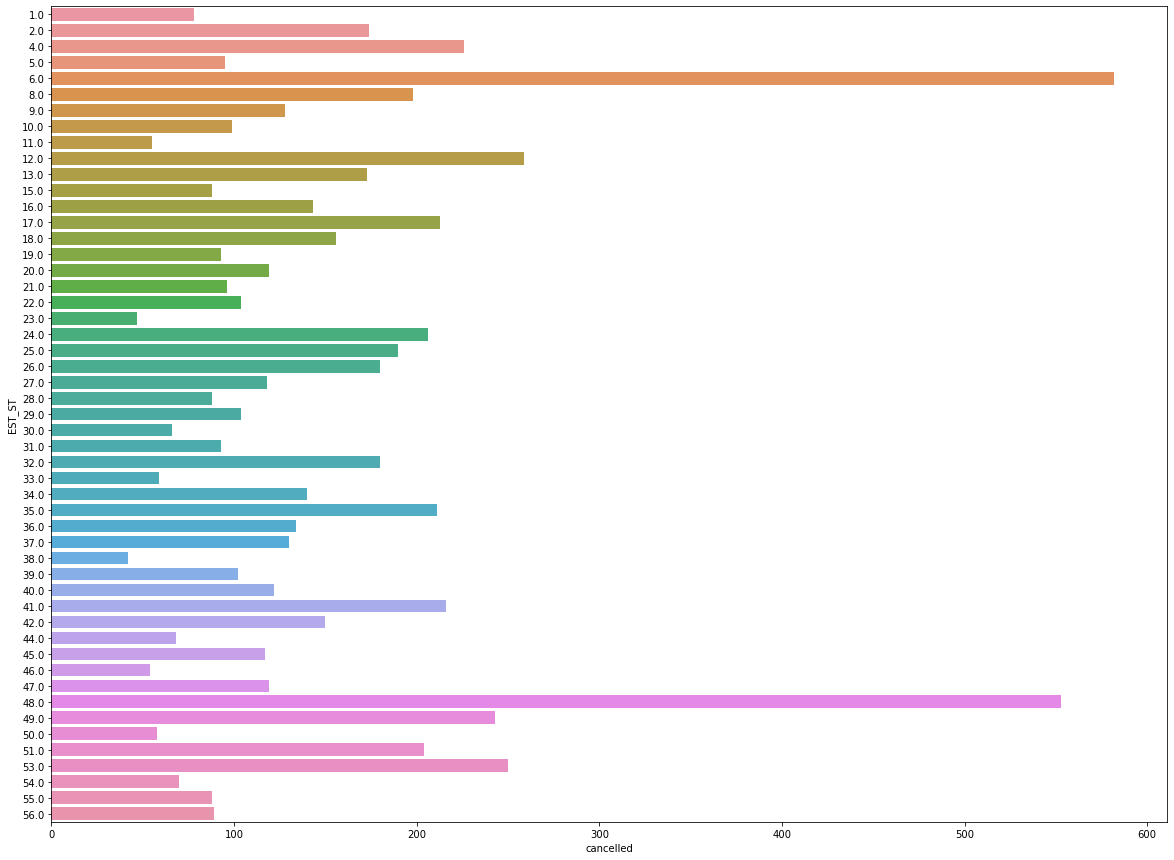

In [416]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x = 'cancelled', y = 'EST_ST', data = location, orient = 'h')

- 6 = California
- 48 = Texas
- 12 = Florida
- 53 = Washington
- 49 = Utah
- 4 = Arizona
- 35 = New Mexico
- 41 = Oregon

Not suprisingly, most of the people who cancelled are either in California or Texas. This could also be due to the size and population of the state

#### Does number of peope in household matter?

It might seem logical that a larger household might be unable to pay for education and decide to cancel. Here we try to understand if that is the case

In [417]:
#THHLD_NUMPER means total household number 

household = unable_pay.THHLD_NUMPER.value_counts().to_frame()
household

,THHLD_NUMPER
4.0,2300
3.0,1606
5.0,1589
6.0,818
2.0,545
7.0,350
8.0,173
10.0,92
9.0,87
1.0,10


<AxesSubplot:ylabel='THHLD_NUMPER'>

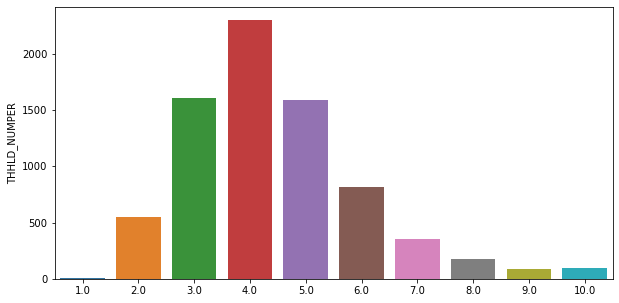

In [418]:
#Household size for people who's plans have change

plt.figure(figsize=(10,5))
sns.barplot(x = household.index, y = household.THHLD_NUMPER, data = household)

An important distinction would be to see the average household for people who's plans have not changed all together

Below are the household numbers of people who's plans for post-sec ed have not changed

<AxesSubplot:ylabel='THHLD_NUMPER'>

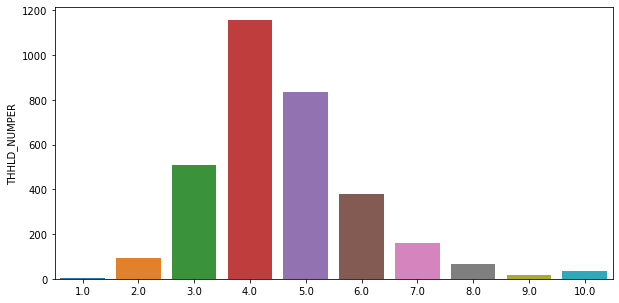

In [419]:
#Household size for people who's plans HAVE NOT change

able_pay = education_df[education_df.PSCHNG1 == 1.0].THHLD_NUMPER.value_counts().to_frame()
plt.figure(figsize=(10,5))
sns.barplot(x = able_pay.index, y = able_pay.THHLD_NUMPER, data = able_pay)

**Does the number of children (under 18) matter?**

Are you more likely to cancel if you have, say, 4 kids versus 2?

<AxesSubplot:ylabel='THHLD_NUMKID'>

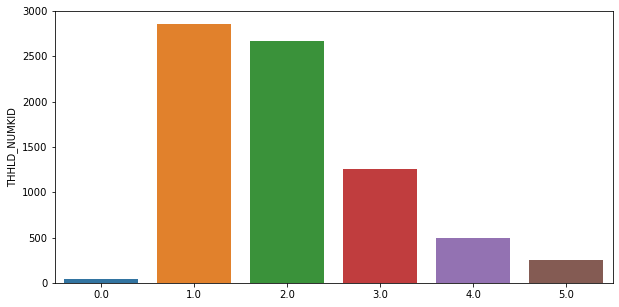

In [420]:
kid_num = unable_pay.THHLD_NUMKID.value_counts().to_frame()
plt.figure(figsize=(10,5))
sns.barplot(x = kid_num.index, y = kid_num.THHLD_NUMKID, data = kid_num)

    *Observation*

People might get concerned that having another child might impact your chances for paying for post-sec ed. The above graph shows that there is very little difference between 1 or 2 child. It is also possible that there are simply not a lot of poeple with 3 or 4 kids reporting on the census

<AxesSubplot:ylabel='THHLD_NUMKID'>

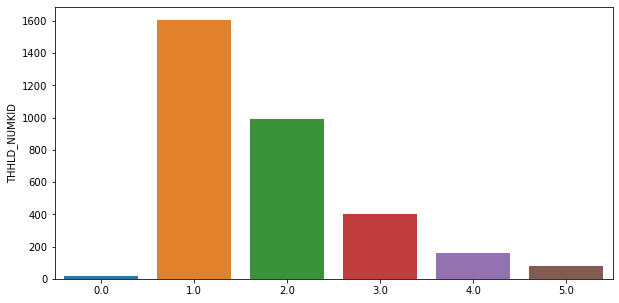

In [421]:
# Below are the number of kids in a household with people who's plans for post-sec ed HAVE NOT changed

able_pay = education_df[education_df.PSCHNG1 == 1.0].THHLD_NUMKID.value_counts().to_frame()
plt.figure(figsize=(10,5))
sns.barplot(x = able_pay.index, y = able_pay.THHLD_NUMKID, data = able_pay)

**What is the break down in Race for the people unable to pay**

<AxesSubplot:ylabel='RRACE'>

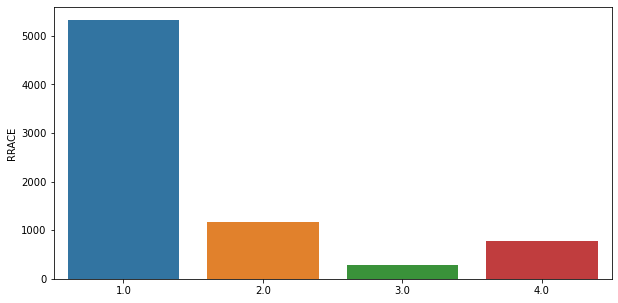

In [422]:
race = unable_pay.RRACE.value_counts().to_frame()
plt.figure(figsize=(10,5))
sns.barplot(x = race.index, y = race.RRACE, data = race)

- 1. White
- 2. Black
- 3. Asian
- 4. Any other

    *Observation*

The overwellming majority are white. However, there are some important caveats. First, these are the people who had plans for college. You might recall that we deleted anyone who answered 0 or "NO" to TNUM_PS (question about number of houshold members with plans for post_sec ed). It is possible that Blacks (2) and others (4) simply don't make extensive education plans because of their situation. Or, if they do, decide to not report in the census. Also, Asians (3) might be more affluent, which would make this num much lower since they would be able to afford college. It is also possible these are the people who would be ok cancelling while other races might not be able to afford that decision

An important limitation to note is that the above numbers are not percentages. We know that there is a larger number of white people in the US. For this reasons, we will view it in percentages below

<AxesSubplot:ylabel='RRACE'>

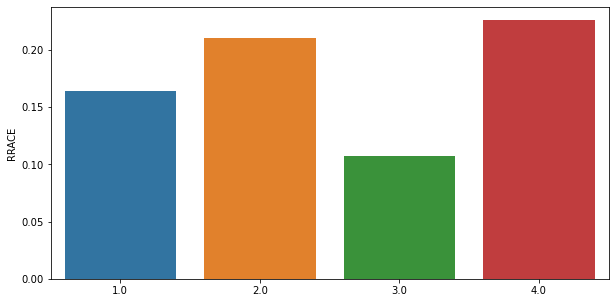

In [423]:
# Percentage of race that are unable to pay and cancelled

race_per = (unable_pay.RRACE.value_counts() / education_df.RRACE.value_counts()).to_frame()
plt.figure(figsize=(10,5))
sns.barplot(x = race_per.index, y = race_per.RRACE, data = race_per)

- 1. White
- 2. Black
- 3. Asian
- 4. Any Other

**What is the break down in hispanics unable to pay (in percentage)**

<AxesSubplot:ylabel='RHISPANIC'>

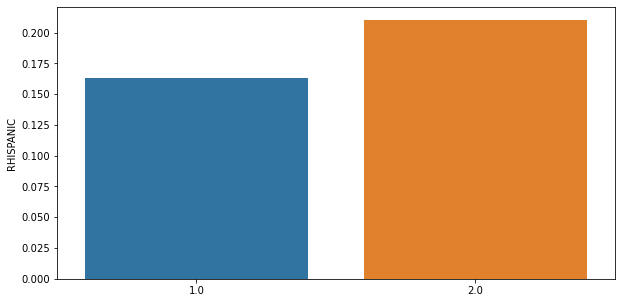

In [424]:
hispanic_per = (unable_pay.RHISPANIC.value_counts() / education_df.RHISPANIC.value_counts()).to_frame()
plt.figure(figsize=(10,5))
sns.barplot(x = hispanic_per.index, y = hispanic_per.RHISPANIC, data = hispanic_per)

- 1. Not Hispanic
- 2. Hispanic

unsurprisingly, Hispanics are more likely to cancel because they are unable to pay. This could me there aren't a lot of financial alternatives for these individuals. 

**What is the break down in the marriage status of the people unable to pay**

<AxesSubplot:ylabel='MS'>

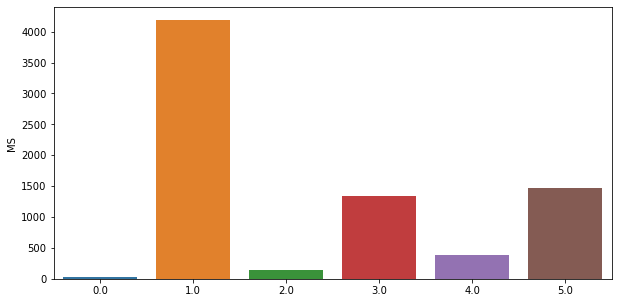

In [425]:
marriage = unable_pay.MS.value_counts().to_frame()
plt.figure(figsize=(10,5))
sns.barplot(x = marriage.index, y = marriage.MS, data = marriage)

- 1. Now Married
- 2. Widowed
- 3. Divorced
- 4. Separated
- 5. Never married

**What is the break down in the degrees for people who were unable to pay**

<AxesSubplot:ylabel='EEDUC'>

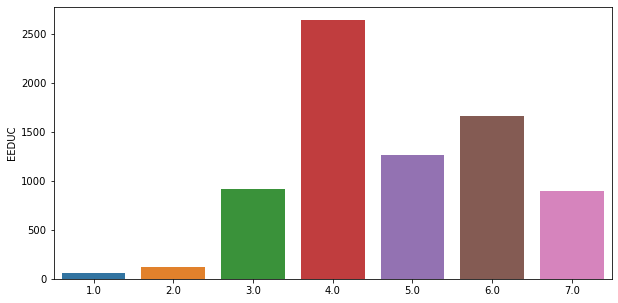

In [426]:
eeduc = unable_pay.EEDUC.value_counts().to_frame()
plt.figure(figsize=(10,5))
sns.barplot(x = eeduc.index, y = eeduc.EEDUC, data = eeduc)

- 1. Less than high school
- 2. Some high school
- 3. Hgih school graduate
- 4. Some college
- 5. Associates degree
- 6. Bachelors degree
- 7. Graduate degree

[Back to the top](#back_to_top)

<a id="concerns"></a>
### Who Are The People Who Cancelled Because of COVID Concerns

Column `PSCHNG2` are individuals who cancelled, and column `PSWHYCHG1` are those people who had covid or concerns about getting covid.

Within the category of people who cancelled their plans, 6009 people cancelled their education because they either had covid or concerns about getting covid (7570 people cancelled because they were unable to pay). Hypothetically, this might seem like the most common reason.

One personal issue I have with this data is that it is difficult to differentiate the individuals who were unable to pay for higher education because of covid from the individuals who were unable to pay prior to the effects of covid. I'd argue the unafforability was a lingering effect prior to the pandemic, potentially scewing these numbers. This section focuses on profile an individual who chose health over education

In [427]:
#PSCHNG2 ==1 means they cancelled their plans
#PSWHYCHG1 == 1 means they had COVID or concerns for COVID

covid_concern = education_df[(education_df['PSCHNG2'] == 1.0) & (education_df['PSWHYCHG1'] == 1.0)]
covid_concern.head()

,SCRAM,WEEK,TNUM_PS,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,EST_ST,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,MS,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,INCOME,COMPAVAIL,INTRNTAVAIL,INTRNTRV1,INTRNTRV2,INTRNTRV3
85,V180010003S30131078200122,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,3.0,1984.0,2.0,1.0,1.0,4.0,1.0,7.0,4.0,3.0,5.0,2.0,2.0,0.0,1.0,0.0
197,V180020001S11211741900112,18.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,4.0,1977.0,1.0,1.0,1.0,6.0,1.0,4.0,2.0,2.0,3.0,2.0,2.0,0.0,1.0,0.0
220,V180020003S32230310010112,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,23.0,1.0,1972.0,1.0,1.0,1.0,6.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
225,V180020004S50240249200112,18.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,24.0,2.0,1976.0,2.0,1.0,1.0,3.0,1.0,5.0,2.0,3.0,3.0,1.0,1.0,0.0,1.0,0.0
646,V180100001S98010005110012,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,1976.0,2.0,1.0,3.0,6.0,1.0,3.0,1.0,2.0,6.0,1.0,1.0,0.0,1.0,0.0


**Who is most likely to be concerned and cancel post sec ed? Male or Female**

<AxesSubplot:ylabel='EGENDER'>

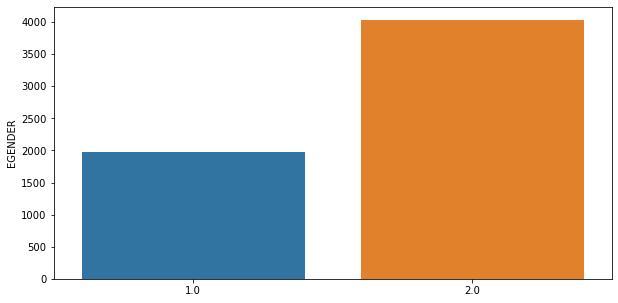

In [428]:
gender = covid_concern.EGENDER.value_counts().to_frame()
plt.figure(figsize=(10,5))
sns.barplot(x = gender.index, y = gender.EGENDER, data = gender)

- 1 = Male
- 2 = Female

    *Observation*

Unsuprisingly, females are way more likely to cancel their education because of COVID. Unclear how many of these individuals actually got covid versus simply having concerns. Other research has shown that mean are more likely to get covid, so it is possible these number is more about concerns as oppose to actually getting covid.

Females overwhelmingly cancelled post-ed plans due to concerns for covid. This is a challenging conversation because it is widely reported that females too tend to struggle going back into the workforce. Obstacles to post-sec ed might exaccerbate this problem

**What is the distribution of birth year for the people who would be willing to cancel due to covid concerns**

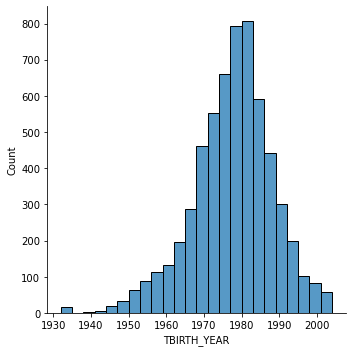

In [429]:
sns.displot(covid_concern, x = 'TBIRTH_YEAR', binwidth = 3)

    *Observation*

Centered around 70s and 90s. Perhaps these people are able to afford cancelling post-sec ed plans. Makes sense because these are the people who are most likely in a place where post-sec ed is not needed and seen more of a luxury or a way to expand their career.

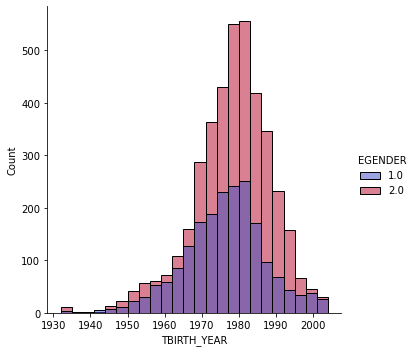

In [430]:
# Distribution of years, male versus female

sns.displot(covid_concern, x = 'TBIRTH_YEAR', binwidth = 3, hue = 'EGENDER', palette = 'coolwarm')

[Back to the top](#back_to_top)

<a id="format"></a>
### Did Computer/Internet Availability Cause People To Cancel 

Column `PSCHNG2` are individuals who cancelled, and columns `PSWHYCHG4` and `PSHWHYCHG7` are those people who had a format changes and those who were uncertainty about their classes, respectively.

The two other common reasons for cancelling education plans were because the format changed (e.g., in-person to remote) and uncertainty about how classes/program might change. At a time when the rise of Zoom made it possible for everything to go remote, I was curious to see if someone's computer or internet availability influenced their decision to cancel. Out of the category of people who cancelled their post-sec ed, we'll look at the people who noted "format change" as their reason and observe their computer/internet availability

Admittedly, this section is simply a quick overview. A more indepth analysis is still needed.

In [431]:
uncertain = education_df[(education_df['PSCHNG2'] == 1.0) & ((education_df['PSWHYCHG4'] == 1.0) | (education_df['PSWHYCHG7']==1.0) )]
uncertain.head()

,SCRAM,WEEK,TNUM_PS,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,EST_ST,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,MS,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,INCOME,COMPAVAIL,INTRNTAVAIL,INTRNTRV1,INTRNTRV2,INTRNTRV3
32,V180000006S37060013300112,18.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2002.0,2.0,1.0,3.0,3.0,5.0,7.0,1.0,6.0,4.0,1.0,2.0,0.0,1.0,0.0
106,V180010006S72160603010112,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,37.0,2.0,1977.0,2.0,1.0,1.0,6.0,4.0,3.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0
195,V180020000S96200869300112,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,37.0,2.0,1983.0,1.0,1.0,1.0,6.0,3.0,4.0,3.0,1.0,5.0,1.0,1.0,0.0,1.0,0.0
220,V180020003S32230310010112,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,23.0,1.0,1972.0,1.0,1.0,1.0,6.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
225,V180020004S50240249200112,18.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,24.0,2.0,1976.0,2.0,1.0,1.0,3.0,1.0,5.0,2.0,3.0,3.0,1.0,1.0,0.0,1.0,0.0


In [432]:
total = uncertain.COMPAVAIL.value_counts().sum()

In [433]:
(uncertain.COMPAVAIL.value_counts()) / total

1.0    0.737077
2.0    0.185036
3.0    0.059914
4.0    0.012958
5.0    0.004041
0.0    0.000975
Name: COMPAVAIL, dtype: float64

- 1. Always available
- 2. Usually available
- 3. Sometimes available
- 4. Rarely availably
- 5. Never available

    *Observation*

73% of everyone who cancelled their post-sec education plans always had access to a computer for educational purpose. This means that even though someone cancelled their plans because of a format change (remote v in-person), they still had access to a computer. Important to note that people who do not have access to a computer for educational purpose could be the same people who are in the lower class. If there is a correlation between low income and not responding to these surveys, then these numbers might not be accurate since.

In [434]:
total = uncertain.INTRNTAVAIL.value_counts().sum()

In [435]:
(uncertain.INTRNTAVAIL.value_counts()) / total

1.0    0.671729
2.0    0.248572
3.0    0.066044
4.0    0.013655
Name: INTRNTAVAIL, dtype: float64

- 1. Always available
- 2. Usually available
- 3. Sometimes available
- 4. Rarely availably

    *Observation*

67% of everyone who cancelled their post-sec education plans always had access to internet for educational purpose. This means that even though someone cancelled their plans because of a format change (remote v in-person), they still had access to the internet


It is possible computer and internet available makes headlines because one change can have a significant impact, but in aggregate, it is not a notable reason for people cancelling their plans. This could be because people might see computer/internet availability as a small obstacle compared with the ramifications of not going to college all together.

[Back to the top](#back_to_top)

<a id="PSCHNG3"></a>
## For Those Who's Format Changed, How Has Technology Played a Role?

**Column Explanation**<br>
Column `PSCHNG3` are individuals experienced a change in format, and columns `PSWHYCHG1` - `PSWHYCHG9` are the reasons for those changes.

**Overview**<br>
Cancelling education plans is the most serious, but a change in format was the most common change with 23,743 people going from in-person to remote in just a few week (as stated in the above section "How has COVID-19 Changed Post-Sec Ed Plans"). Notably, this was already during the pandemic, so the initial impact of going remote was significantly higher. We'll exit cancellation and cover format change in this section.

In [436]:
#assigned above
#recall these are the reasons for the change

why

['PSWHYCHG1',
 'PSWHYCHG2',
 'PSWHYCHG3',
 'PSWHYCHG4',
 'PSWHYCHG5',
 'PSWHYCHG6',
 'PSWHYCHG7',
 'PSWHYCHG8',
 'PSWHYCHG9']

In [437]:
# We filter the df based on who answers yes to the whether they experienced a formatting change and
# look at the reasons

format_change = education_df[education_df.PSCHNG3 == 1.0][why]
format_change.head()

,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9
49,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
155,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
191,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [438]:
format_change_sum = pd.DataFrame(data = format_change.sum(), columns=['sums'], index = format_change.sum().index)
format_change_sum

,sums
PSWHYCHG1,5918.0
PSWHYCHG2,397.0
PSWHYCHG3,1739.0
PSWHYCHG4,17446.0
PSWHYCHG5,2002.0
PSWHYCHG6,4630.0
PSWHYCHG7,4330.0
PSWHYCHG8,3045.0
PSWHYCHG9,1342.0


Below are the results of the most common reasons why format changed. It should come to no suprise that "Institution changed content or format of classes" is the number one reason. Still, here we will begin trying to understand the computer and internet availability of people who experienced this change.

It stands to reason that if schools, businesses, and organizations are going remote, that people with limited availability to computer and internet will have a more difficult time

<AxesSubplot:ylabel='sums'>

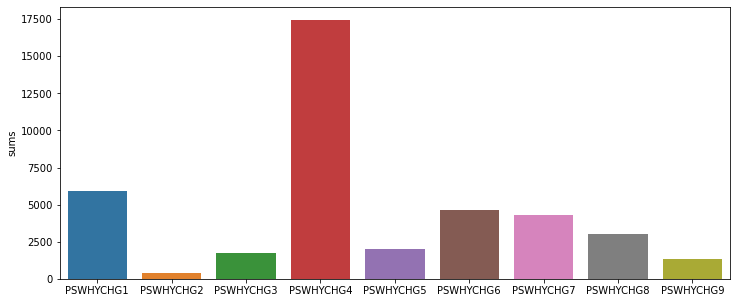

In [439]:
plt.figure(figsize = (12,5))
sns.barplot(x = format_change_sum.index, y = format_change_sum['sums'], data = format_change_sum)

- PSWHYCHG1: Had covid or concerns about getting covid
- PSWHYCHG2: Caring for someone with coronavirus
- PSWHYCHG3: Caring for others whose care arrangements are disrupted (e.g., loss of day care or adult care programs)
- **PSWHYCHG4: Institution changed content or format of classes (in-person to online)**
- PSWHYCHG5: Changes to financial aid
- PSWHYCHG6: Changes to campus life
- PSWHYCHG7: Uncertainty about how classes/program might change 
- PSWHYCHG8: Not able to pay for classes
- PSWHYCHG9: Other reason

<a id="computer"></a>
### Computer Availability

We've become very dependent on technology, especially during the pandemic. However, the debate around staying remote, in-person, or hybrid revolves around people's computer and internet availability. 

Out of all the people who experienced some I was curious to see the computer/internet availability of people who 

Below we will get the percentage of computer availability for people who experienced a change in the format of their classes

- 1. Always available
- 2. Usually available
- 3. Sometimes available
- 4. Rarely availably
- 5. Never available

In [440]:
# Total num of computer availability for people with post-sec ed plans

education_df.COMPAVAIL.value_counts()

1.0    34711
2.0     6920
3.0     1970
4.0      442
5.0      132
0.0       52
Name: COMPAVAIL, dtype: int64

In [441]:
# Num of computer availability for people who's format for classes changed to online

education_df[education_df.PSCHNG3 == 1.0]['COMPAVAIL'].value_counts()

1.0    19733
2.0     3115
3.0      698
4.0      134
5.0       47
0.0       16
Name: COMPAVAIL, dtype: int64

In [442]:
# Percentage of computer availability for people who's format for classes changed to online

comp_available = education_df[education_df.PSCHNG3 == 1.0]['COMPAVAIL'].value_counts() / education_df.COMPAVAIL.value_counts()
comp_available

1.0    0.568494
2.0    0.450145
3.0    0.354315
4.0    0.303167
5.0    0.356061
0.0    0.307692
Name: COMPAVAIL, dtype: float64

- 1. Always available
- 2. Usually available
- 3. Sometimes available
- 4. Rarely availably
- 5. Never available

<AxesSubplot:ylabel='COMPAVAIL'>

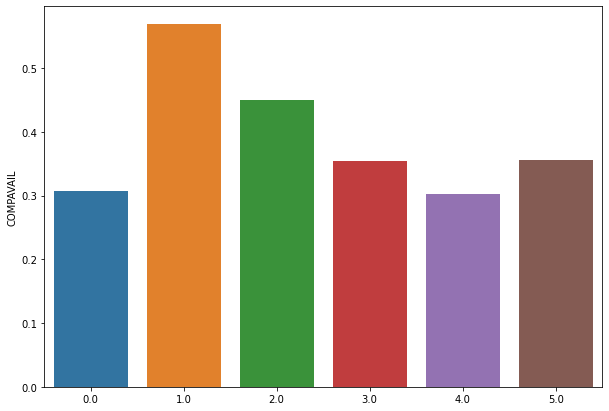

In [443]:
plt.figure(figsize=(10,7))
sns.barplot(x = comp_available.index, y = comp_available)

- 1. Always available
- 2. Usually available
- 3. Sometimes available
- 4. Rarely availably
- 5. Never available

    *Observation*

A concerning number is that 35% of people who were in a position to experience a format change (in-person to online) *sometimes* had availability to a computer.

This means that schools must really reconsider "staying remote" since this could present issues for those people. A decision to go virtual is still impacting people

<a id="internet"></a>
### Internet Availability

- 1. Always available
- 2. Usually available
- 3. Sometimes available
- 4. Rarely availably

In [444]:
# Total num of internet availability for people with post-sec ed plans

education_df.INTRNTAVAIL.value_counts()

1.0    31985
2.0     9556
3.0     2242
4.0      444
Name: INTRNTAVAIL, dtype: int64

In [445]:
# Internet availability for people who's format for classes changed to online

education_df[education_df.PSCHNG3 == 1.0]['INTRNTAVAIL'].value_counts()

1.0    18277
2.0     4519
3.0      808
4.0      139
Name: INTRNTAVAIL, dtype: int64

In [446]:
# Percentage of internet availability for people who's format for classes changed to online

intr_available = education_df[education_df.PSCHNG3 == 1.0]['INTRNTAVAIL'].value_counts() / education_df.INTRNTAVAIL.value_counts()
intr_available

1.0    0.571424
2.0    0.472897
3.0    0.360393
4.0    0.313063
Name: INTRNTAVAIL, dtype: float64

- 1. Always available
- 2. Usually available
- 3. Sometimes available
- 4. Rarely availably

<AxesSubplot:ylabel='INTRNTAVAIL'>

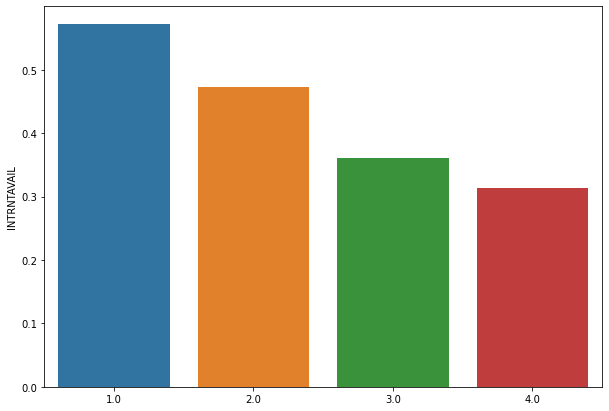

In [447]:
plt.figure(figsize=(10,7))
sns.barplot(x = intr_available.index, y = intr_available)

- 1. Always available
- 2. Usually available
- 3. Sometimes available
- 4. Rarely availably

Out of the people who experienced a format change, 67% of those people sometimes or rarely had internet availability. This a concerning percentage; however, it is worth noting that people still have been able to manage. It is unclear of the long term effects this will have in the workforce, if any. If individuals struggle to excel at their education because they have to manuveur how to get a computer or internet, then it might be reflected on the incoming class. Schools, businesses, and organizations should weigh in the obstacles that some of these people will face should they decide to stay remote continue 

[Back to the top](#back_to_top)

---

---

---

<a id="data_analysis"></a>
# DATA ANALYSIS

Since cancelling post-sec ed plans contains the most serious consequences, we will focus our analysis on constructing a model that can predict whether or not an individual will cancel their plans. We'll use two models **k-Nearest Neighbors** and **Decision Tree**.

We'll begin by seeing if there are any alarming correlations that we should remove from our model. We'll split the dataset in 3; train, validation, and test datasets. We'll perform feature selection and choose the top 15 variables. Then, we'll train the model, test it on the validation dataset, and then test it one final time on the test dataset

**DISCLAIMER**<br>
Strangely, the model performed extremely well. Contrary to public sentiment, I am initially discouraged by these results as there is most likely multicollinearity or over fitting involved. The procedure was helpful, but a more serious look at the attributes of the datasets should be done, and a closer look at the hypertuning should be examined.

In [448]:
import graphviz
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, recall_score, plot_confusion_matrix, plot_roc_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
pd.set_option('display.notebook_repr_html', True)

In [449]:
def print_tree(d_tree, f_names, c_names=None):
    dot_data = tree.export_graphviz(d_tree, out_file=None, feature_names=f_names, class_names=c_names, 
                                    filled=True, rounded=True, special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph 

In [450]:
correlation = ['TBIRTH_YEAR', 'EGENDER', 'RHISPANIC',
       'RRACE', 'EEDUC', 'MS', 'THHLD_NUMPER', 'THHLD_NUMKID',
       'INCOME', 'COMPAVAIL', 'INTRNTAVAIL', 'WEEK', 'TNUM_PS', 'PSCHNG1', 'PSCHNG2', 'PSCHNG3', 'PSCHNG4',
       'PSCHNG5', 'PSCHNG6', 'PSCHNG7', 'PSWHYCHG1', 'PSWHYCHG2', 'PSWHYCHG3',
       'PSWHYCHG4', 'PSWHYCHG5', 'PSWHYCHG6', 'PSWHYCHG7', 'PSWHYCHG8',
       'PSWHYCHG9', 'EST_ST']

### Correlations

We first analysis to see if there are any concerning correlations. We do not want to include those in our model

In [451]:
corr_df = education_df[correlation]
corr_df.head()

,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,MS,THHLD_NUMPER,THHLD_NUMKID,INCOME,COMPAVAIL,INTRNTAVAIL,WEEK,TNUM_PS,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,EST_ST
32,2002.0,2.0,1.0,3.0,3.0,5.0,7.0,1.0,4.0,1.0,2.0,18.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
49,1978.0,1.0,1.0,1.0,6.0,1.0,5.0,2.0,8.0,1.0,1.0,18.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0
85,1984.0,2.0,1.0,1.0,4.0,1.0,7.0,4.0,5.0,2.0,2.0,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
105,1974.0,1.0,1.0,1.0,7.0,1.0,4.0,1.0,6.0,1.0,1.0,18.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
106,1977.0,2.0,1.0,1.0,6.0,4.0,3.0,2.0,1.0,1.0,2.0,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,37.0


<AxesSubplot:>

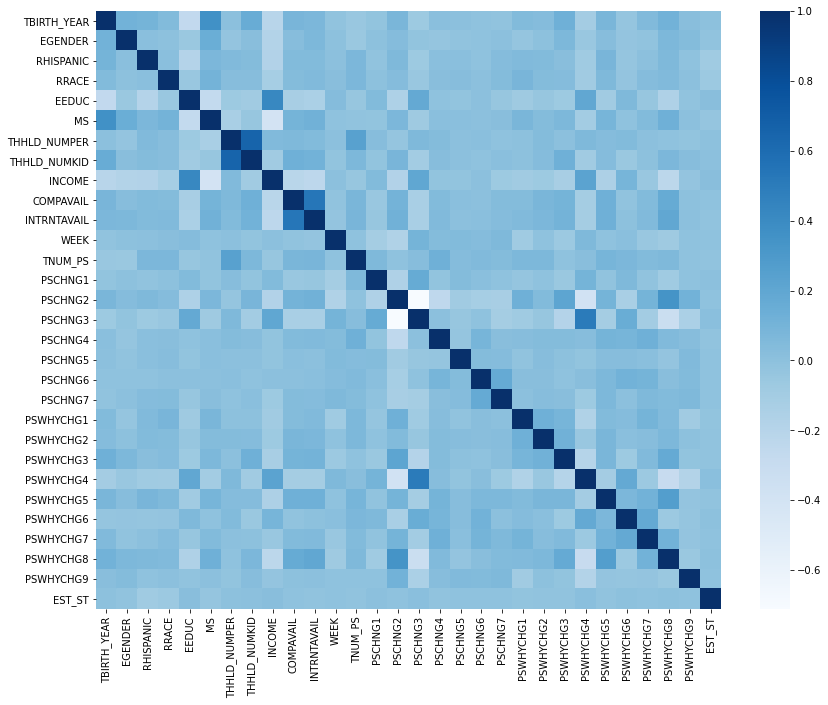

In [452]:
plt.figure(figsize=(14,11))
sns.heatmap(corr_df.corr(), cmap = 'Blues')

Since there are no alarming correlations, we will proceed as normal

[Back to the top](#back_to_top)

<a id="dataset"></a>
## Creating the Training and Testing Datasets

### Dropping irrelevant columns and setting X and Y

SCRAM and week have already serve their purpose. For our model, we will remove those columns

In [453]:
education_df.shape

(44227, 36)

In [454]:
education_df.drop(['SCRAM', 'WEEK'], axis = 1, inplace = True)

In [455]:
# Predict if someone is going to cancel their plans (PSCHNG2 = 1)

x = education_df.drop('PSCHNG2', axis = 1)
y = education_df.PSCHNG2

### Train Test Validate Split

Since our dataset is fairly large, we will include a validation dataset so that we can first test on the validation dataset and then again on the actual test dataset

In [456]:
# 60%     40%   |  60%     40%
x_train, x_test_temp, y_train, y_test_temp = train_test_split(x, y, test_size=0.40, random_state=42)

# 20%     20% |  20%   20%
x_val, x_test, y_val, y_test = train_test_split(x_test_temp, y_test_temp, test_size=0.5, random_state=42) 

In [457]:
# Independent Variable Shapes

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(26536, 33)
(8846, 33)
(8845, 33)


In [458]:
# Dependent Shapes

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(26536,)
(8846,)
(8845,)


<a id="feature"></a>
## Feature Selection

We'll use chi^2 to select the top 15 best features to include in our model

In [459]:
ch2 = SelectKBest(chi2, k=15)
x_train = ch2.fit_transform(x_train, y_train)
x_val = ch2.transform(x_val)
x_test = ch2.transform(x_test)

In [460]:
#After Feature Selection

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(26536, 15)
(8845, 15)
(8846, 15)


In [461]:
# Below are the 15 best features
cols = ch2.get_support(indices=True)
education_df.iloc[:,cols].columns

Index(['PSCHNG1', 'PSCHNG2', 'PSCHNG3', 'PSCHNG5', 'PSCHNG6', 'PSCHNG7',
       'PSWHYCHG2', 'PSWHYCHG3', 'PSWHYCHG4', 'PSWHYCHG5', 'PSWHYCHG6',
       'PSWHYCHG7', 'PSWHYCHG8', 'RRACE', 'THHLD_NUMADLT'],
      dtype='object')

[Back to the top](#back_to_top)

<a id="knn"></a>
## k-Nearest Neighbors

### Train and Validation datasets only

In [462]:
#create the empty df, where we will add the results as rows
knn_df = pd.DataFrame(columns=['neighbor', 'weight', 'accuracy', 'recall', 'f1', 'roc_area'])

#We'll loop over the model, hypertuning simultaneously
for neighbor in range(1, 11):
    for weight in ['uniform', 'distance']:
        
        #The Algorithm
        knn = KNeighborsClassifier(n_neighbors=neighbor, weights=weight) #initialize the classifier
        knn.fit(x_train, y_train) #train it using the training datasets
        y_predict = knn.predict(x_val) #predict using the validation dataset, acting as the test dataset
        y_pred_prob = knn.predict_proba(x_val)[:, 1]
        
        #metrics
        accuracy = knn.score(x_val, y_val) #y_val is acting as the testing dataset here
        recall = recall_score(y_val, y_predict, average='weighted')
        f1 = f1_score(y_val, y_predict, average='weighted')
        roc = roc_auc_score(y_val, y_pred_prob)
        
        #create the dictionary with all desired metrics that will be added to the df
        dicc = {'neighbor':neighbor, 'weight':weight, 'accuracy':accuracy, 'recall':recall, 'f1':f1, 'roc_area':roc}
        
        
        #append the dictionary to knn_df
        knn_df = knn_df.append(dicc, ignore_index = True)

knn_df.set_index(['neighbor', 'weight'], inplace=True)
knn_df

accuracy    recall        f1  roc_area
neighbor weight                                          
1        uniform   0.902318  0.902318  0.902659  0.899181
         distance  0.902318  0.902318  0.902659  0.899181
2        uniform   0.919955  0.919955  0.918963  0.936800
         distance  0.916902  0.916902  0.916172  0.931908
3        uniform   0.921990  0.921990  0.922066  0.946652
         distance  0.922781  0.922781  0.922788  0.939932
4        uniform   0.932052  0.932052  0.931700  0.948947
         distance  0.929452  0.929452  0.929212  0.940920
5        uniform   0.923007  0.923007  0.923080  0.950935
         distance  0.924590  0.924590  0.924541  0.942263
6        uniform   0.929678  0.929678  0.929477  0.954395
         distance  0.928547  0.928547  0.928363  0.944810
7        uniform   0.919050  0.919050  0.919187  0.954696
         distance  0.923799  0.923799  0.923761  0.945443
8        uniform   0.926399  0.926399  0.926294  0.954900
         distance  0.925834  0.925834  0.925721  0.945802
9        uniform   0.916563  0.916563  0.916762  0.956829
         distance  0.924025  0.924025  0.923973  0.947199
10       uniform   0.923912  0.923912  0.923914  0.957639
         distance  0.926286  0.926286  0.926179  0.948064

Given the above results, we'll use `weight = 'uniform'` and `neighbor = 8`

### Train and Test the kNN Model

In [463]:
#Initialize the classifier and train the data

knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [464]:
#Predicting the outcome for the test set

y_test_predicted = knn.predict(x_test)

<a id="evalknn"></a>
### Evaluation of the kNN Model

As noted in the intro of Data Analysis (please reference my notes above), the model performed too well. Contrary to public sentiment, I am initially discouraged by these results as there is most likely multicollinearity or over fitting involved. The procedure was helpful, but a more serious look at the attributes of the datasets should be done, and a closer look at the hypertuning should be examined.

KNN RESULTS
Accuracy:  0.932851006104454


Confusion Matrix: 
[[5196  262]
 [ 332 3056]]


Classification Resport: 
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      5458
         1.0       0.92      0.90      0.91      3388

    accuracy                           0.93      8846
   macro avg       0.93      0.93      0.93      8846
weighted avg       0.93      0.93      0.93      8846





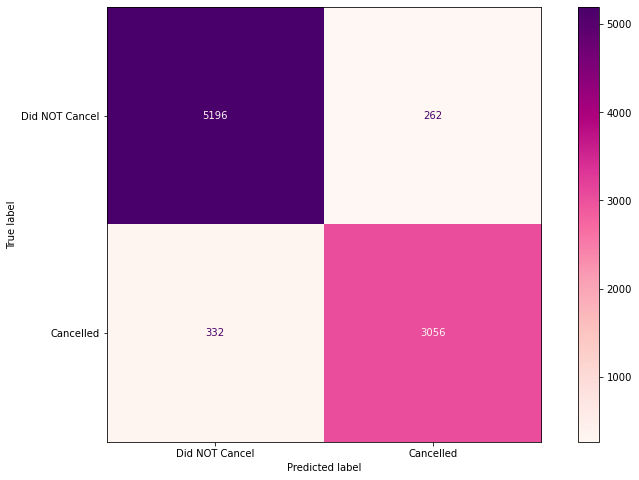

In [465]:
conf_matrix = confusion_matrix(y_test, y_test_predicted)

print('KNN RESULTS')
print('Accuracy: ', knn.score(x_test, y_test))
print('\n')
print('Confusion Matrix: \n' + str(conf_matrix))
print('\n')
print('Classification Resport: \n', classification_report(y_test, y_test_predicted))
print('\n')

disp = plot_confusion_matrix(knn, x_test, y_test, display_labels=['Did NOT Cancel', 'Cancelled'], cmap=plt.cm.RdPu, normalize = None)
print(disp)

Area under the ROC: 0.9555602880080711


<Figure size 720x360 with 0 Axes>

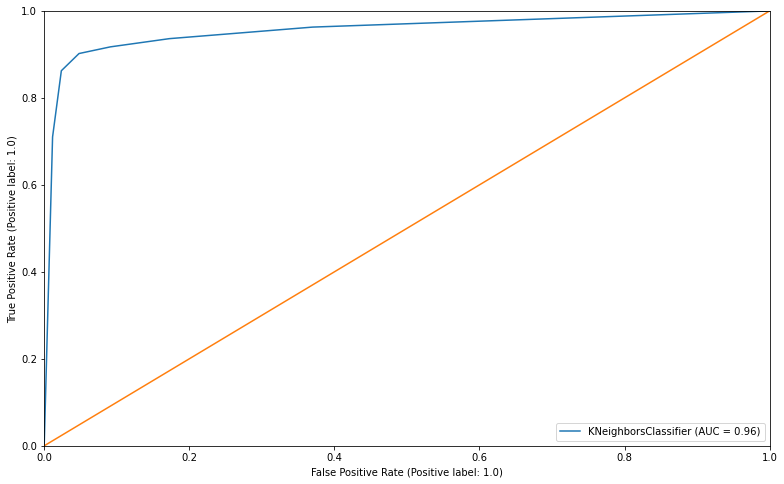

In [466]:
plt.figure(figsize=(10,5))
viz = plot_roc_curve(knn, x_test, y_test)
print('Area under the ROC:', viz.roc_auc)   
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.show();

[Back to the top](#back_to_top)

<a id="tree"></a>
## Decision Tree

In addition to a kNN model, we'll include an additional classification model and visualize it

### Train Test Validate Split

We'll re establish the training, testing, validation split

In [467]:
# prepare data

x = education_df.drop('PSCHNG2', axis = 1)
y = education_df.PSCHNG2

In [468]:
# 60%     40%   |  60%     40%
x_train, x_test_temp, y_train, y_test_temp = train_test_split(x, y, test_size=0.40, random_state=42)

# 20%     20% |  20%   20%
x_val, x_test, y_val, y_test = train_test_split(x_test_temp, y_test_temp, test_size=0.5, random_state=42) 

### Decision Tree Model
#### Train and Validation Datasets Only

In [469]:
tree_df = pd.DataFrame(columns=['leaf_nodes', 'features', 'accuracy', 'recall', 'f1'])

for leaf_node in range(2, 11):
    for max_feature in range(1,11):
        
        # The Algorithm
        clftree = DecisionTreeClassifier(max_leaf_nodes = leaf_node, max_features = max_feature, random_state=23)
        clftree.fit(x_train, y_train)
        y_pred = clftree.predict(x_val)
        
        # Metrics
        accuracy = clftree.score(x_val, y_val) #y_val is acting as the testing dataset
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')
        
        # Create dicc with the metrics
        dicc = {'leaf_nodes':leaf_node, 'features':max_feature, 'accuracy':accuracy, 'recall':recall, 'f1':f1}
        
        # Append the dicc to tree_df
        tree_df = tree_df.append(dicc, ignore_index = True)

In [470]:
tree_df = tree_df.sort_values('accuracy', ascending=False)
tree_df.head(10)

,leaf_nodes,features,accuracy,recall,f1
89,10.0,10.0,0.956812,0.956812,0.956323
88,10.0,9.0,0.946184,0.946184,0.945780
78,9.0,9.0,0.946184,0.946184,0.945780
79,9.0,10.0,0.936914,0.936914,0.936695
49,6.0,10.0,0.928434,0.928434,0.928387
59,7.0,10.0,0.928434,0.928434,0.928387
39,5.0,10.0,0.928434,0.928434,0.928387
69,8.0,10.0,0.928434,0.928434,0.928387
29,4.0,10.0,0.928321,0.928321,0.928263
19,3.0,10.0,0.916563,0.916563,0.916809


Given the results above, we will test the model using the test data `leaf_nodes = 10` and `max_features = 9`

#### Train and Test Datasets

In [471]:
clftree = DecisionTreeClassifier(max_leaf_nodes=10, max_features=9, random_state=23)
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_features=9, max_leaf_nodes=10, random_state=23)

<a id="evaltree"></a>
### Evaluation of the Decision Tree Model

In [472]:
# Use the test dataset
print("Accuracy of the test data:", clftree.score(x_test,y_test))

# confusion matrix
print("Confusion Matrix")
cm_final = pd.DataFrame(confusion_matrix(y_test, clftree.predict(x_test)), index=['No', 'Yes'], columns=['No', 'Yes'])
cm_final.index.name = 'Actual'
cm_final.columns.name = 'Predicted'
display(cm_final)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, clftree.predict(x_test)))

Accuracy of the test data: 0.9485643228577888
Confusion Matrix


Predicted,No,Yes
Actual,,
No,5331,127
Yes,328,3060


Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      5458
         1.0       0.96      0.90      0.93      3388

    accuracy                           0.95      8846
   macro avg       0.95      0.94      0.94      8846
weighted avg       0.95      0.95      0.95      8846



<a id="viztree"></a>
### Visualization of the Decision Tree Model

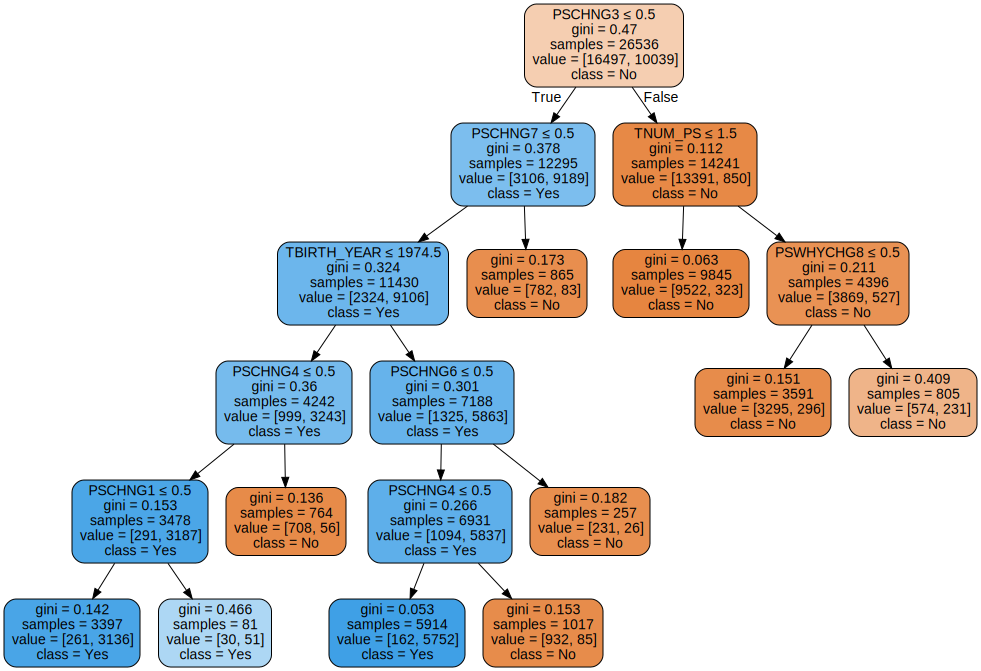

In [473]:
tree_graph = print_tree(d_tree=clftree, f_names=x.columns, c_names=['No', 'Yes'])
tree_graph

[Back to the top](#back_to_top)

Thank you

----